# HMM outputs (S=6) 

In [1]:
from pathlib import Path
import numpy as np
import pandas as pd

ROOT = Path("/Users/onilarasanjala/Desktop/TSeme/CogNeuSci/CodeData/NewDynamicNW/results1")

FEAT_CSV = ROOT / "features_HMM_L1_Ln_delta_K20_S6.csv"
RUNIDX_CSV = ROOT / "run_index_K20_S6.csv"

RUNS_METRICS_DIR = ROOT / "runs_metrics"
RUNS_STATES_DIR  = ROOT / "runs_states"

print("ROOT exists:", ROOT.exists())
print("Feature file:", FEAT_CSV.exists(), FEAT_CSV)
print("Run index:", RUNIDX_CSV.exists(), RUNIDX_CSV)
print("metrics dir:", RUNS_METRICS_DIR.exists(), RUNS_METRICS_DIR)
print("states dir:", RUNS_STATES_DIR.exists(), RUNS_STATES_DIR)

ROOT exists: True
Feature file: True /Users/onilarasanjala/Desktop/TSeme/CogNeuSci/CodeData/NewDynamicNW/results1/features_HMM_L1_Ln_delta_K20_S6.csv
Run index: True /Users/onilarasanjala/Desktop/TSeme/CogNeuSci/CodeData/NewDynamicNW/results1/run_index_K20_S6.csv
metrics dir: True /Users/onilarasanjala/Desktop/TSeme/CogNeuSci/CodeData/NewDynamicNW/results1/runs_metrics
states dir: True /Users/onilarasanjala/Desktop/TSeme/CogNeuSci/CodeData/NewDynamicNW/results1/runs_states


In [2]:
feat = pd.read_csv(FEAT_CSV)
feat.head()

,subject,DELTA_occ_state0,DELTA_dwell_state0,DELTA_occ_state1,DELTA_dwell_state1,DELTA_occ_state2,DELTA_dwell_state2,DELTA_occ_state3,DELTA_dwell_state3,DELTA_occ_state4,DELTA_dwell_state4,DELTA_occ_state5,DELTA_dwell_state5,DELTA_switch_rate,DELTA_num_transitions,DELTA_trans_entropy_mean
0,sub-01,-0.008961,0.387363,-0.001792,0.909341,0.000000,0.0,-0.003584,-2.0,0.014337,8.0,0.0,0.0,-0.007181,-4.0,-0.055770
1,sub-02,0.066308,1.490909,-0.071685,-2.000000,0.001792,1.0,0.000000,0.0,0.003584,2.0,0.0,0.0,0.007181,4.0,0.109978
2,sub-03,0.082437,3.066667,-0.082437,-3.066667,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,-0.032414
3,sub-04,-0.093190,-0.503759,0.123656,13.279412,0.000000,0.0,-0.030466,0.5,0.000000,0.0,0.0,0.0,-0.043088,-24.0,-0.043845
4,sub-05,0.050179,1.283333,-0.053763,-8.369048,0.000000,0.0,0.000000,0.0,0.003584,2.0,0.0,0.0,0.010772,6.0,0.112886


In [3]:
feat = feat.set_index("subject")
print("N subjects:", feat.shape[0])
print("N features:", feat.shape[1])
feat.describe().T.head(10)

N subjects: 26
N features: 15


,count,mean,std,min,25%,50%,75%,max
DELTA_occ_state0,26.0,0.007237,0.041377,-0.093190,-0.006720,0.000000,0.017025,0.082437
DELTA_dwell_state0,26.0,-0.113439,2.242539,-6.000000,-0.575940,0.053571,1.439015,3.066667
DELTA_occ_state1,26.0,-0.002688,0.042790,-0.087814,-0.001344,0.000000,0.004032,0.123656
DELTA_dwell_state1,26.0,-0.607755,7.982653,-21.088889,-1.101716,0.000000,0.000000,24.512821
DELTA_occ_state2,26.0,0.012913,0.046781,-0.045985,0.000000,0.000000,0.004480,0.195341
DELTA_dwell_state2,26.0,0.317176,0.998103,-1.220096,0.000000,0.000000,0.801190,3.810185
DELTA_occ_state3,26.0,-0.002964,0.010363,-0.039427,0.000000,0.000000,0.000000,0.012545
DELTA_dwell_state3,26.0,-8.678365,41.299820,-210.000000,0.000000,0.000000,0.000000,7.000000
DELTA_occ_state4,26.0,-0.013878,0.047334,-0.188172,0.000000,0.000000,0.003136,0.045985
DELTA_dwell_state4,26.0,0.397292,3.448603,-6.821237,0.000000,0.000000,2.000000,8.000000


In [4]:
missing = feat.isna().sum().sum()
print("Total missing cells:", missing)

# If any NaNs, fill with 0 (safe for delta metrics) OR drop subjects
feat = feat.fillna(0.0)

Total missing cells: 0


In [5]:
LABELS = Path("/Users/onilarasanjala/Desktop/TSeme/CogNeuSci/CodeData/NewPCA/proficiency_labels.csv")
labels = pd.read_csv(LABELS).set_index("subject")
labels["group"] = labels["group"].str.lower().str.strip()
labels["y"] = (labels["group"] == "advanced").astype(int)

df = feat.join(labels[["group","y"]], how="inner")
print(df["group"].value_counts())
df.head()

group
advanced        15
intermediate    11
Name: count, dtype: int64


,DELTA_occ_state0,DELTA_dwell_state0,DELTA_occ_state1,DELTA_dwell_state1,DELTA_occ_state2,DELTA_dwell_state2,DELTA_occ_state3,DELTA_dwell_state3,DELTA_occ_state4,DELTA_dwell_state4,DELTA_occ_state5,DELTA_dwell_state5,DELTA_switch_rate,DELTA_num_transitions,DELTA_trans_entropy_mean,group,y
subject,,,,,,,,,,,,,,,,,
sub-01,-0.008961,0.387363,-0.001792,0.909341,0.000000,0.0,-0.003584,-2.0,0.014337,8.0,0.0,0.0,-0.007181,-4.0,-0.055770,advanced,1
sub-02,0.066308,1.490909,-0.071685,-2.000000,0.001792,1.0,0.000000,0.0,0.003584,2.0,0.0,0.0,0.007181,4.0,0.109978,advanced,1
sub-03,0.082437,3.066667,-0.082437,-3.066667,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,-0.032414,advanced,1
sub-04,-0.093190,-0.503759,0.123656,13.279412,0.000000,0.0,-0.030466,0.5,0.000000,0.0,0.0,0.0,-0.043088,-24.0,-0.043845,advanced,1
sub-05,0.050179,1.283333,-0.053763,-8.369048,0.000000,0.0,0.000000,0.0,0.003584,2.0,0.0,0.0,0.010772,6.0,0.112886,advanced,1


In [6]:
X = df.drop(columns=["group","y"])
y = df["y"].values
subjects = df.index.tolist()

print("X:", X.shape, "y:", y.shape)

X: (26, 15) y: (26,)


In [7]:
from sklearn.model_selection import LeaveOneOut, cross_val_predict
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import balanced_accuracy_score, roc_auc_score

pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", LogisticRegression(penalty="l2", solver="liblinear", max_iter=5000))
])

loo = LeaveOneOut()
y_prob = cross_val_predict(pipe, X, y, cv=loo, method="predict_proba")[:,1]
y_pred = (y_prob >= 0.5).astype(int)

bal = balanced_accuracy_score(y, y_pred)
auc = roc_auc_score(y, y_prob)

print("HMM DELTA LOOCV balanced acc:", bal)
print("HMM DELTA LOOCV AUC:", auc)

HMM DELTA LOOCV balanced acc: 0.403030303030303
HMM DELTA LOOCV AUC: 0.4787878787878788


In [8]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import roc_auc_score

rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=100, random_state=42)

aucs, bals = [], []
for train, test in rskf.split(X, y):
    pipe.fit(X.iloc[train], y[train])
    prob = pipe.predict_proba(X.iloc[test])[:,1]
    pred = (prob >= 0.5).astype(int)
    aucs.append(roc_auc_score(y[test], prob))
    bals.append(balanced_accuracy_score(y[test], pred))

print("RepeatedCV AUC mean±sd:", np.mean(aucs), np.std(aucs))
print("RepeatedCV BAL mean±sd:", np.mean(bals), np.std(bals))

RepeatedCV AUC mean±sd: 0.514888888888889 0.2785332836905794
RepeatedCV BAL mean±sd: 0.4601666666666666 0.20604604393732537


In [9]:
pipe.fit(X, y)
coef = pipe.named_steps["clf"].coef_[0]
weights = pd.Series(coef, index=X.columns).sort_values()

print("Top features toward INTERMEDIATE (negative):")
display(weights.head(12))

print("\nTop features toward ADVANCED (positive):")
display(weights.tail(12))

Top features toward INTERMEDIATE (negative):


DELTA_occ_state3           -1.031353
DELTA_occ_state1           -0.543593
DELTA_dwell_state1         -0.367008
DELTA_dwell_state3         -0.348723
DELTA_trans_entropy_mean   -0.247650
DELTA_switch_rate          -0.220736
DELTA_num_transitions      -0.206277
DELTA_dwell_state2         -0.151128
DELTA_occ_state0           -0.116565
DELTA_dwell_state0         -0.062973
DELTA_dwell_state4          0.082874
DELTA_occ_state4            0.200062
dtype: float64


Top features toward ADVANCED (positive):


DELTA_dwell_state3         -0.348723
DELTA_trans_entropy_mean   -0.247650
DELTA_switch_rate          -0.220736
DELTA_num_transitions      -0.206277
DELTA_dwell_state2         -0.151128
DELTA_occ_state0           -0.116565
DELTA_dwell_state0         -0.062973
DELTA_dwell_state4          0.082874
DELTA_occ_state4            0.200062
DELTA_dwell_state5          0.323521
DELTA_occ_state2            0.513247
DELTA_occ_state5            0.620526
dtype: float64

In [10]:
from sklearn.utils import resample

n_boot = 1000
coef_mat = []

for i in range(n_boot):
    Xb, yb = resample(X, y, replace=True, random_state=i, stratify=y)
    pipe.fit(Xb, yb)
    coef_mat.append(pipe.named_steps["clf"].coef_[0])

coef_df = pd.DataFrame(coef_mat, columns=X.columns)

boot_summary = pd.DataFrame({
    "mean_weight": coef_df.mean(),
    "std_weight": coef_df.std(),
    "abs_mean": coef_df.mean().abs()
}).sort_values("abs_mean", ascending=False)

boot_summary.head(15)

,mean_weight,std_weight,abs_mean
DELTA_occ_state3,-0.876798,0.290490,0.876798
DELTA_occ_state5,0.536484,0.248633,0.536484
DELTA_occ_state1,-0.445558,0.350282,0.445558
DELTA_dwell_state3,-0.410237,0.201560,0.410237
DELTA_dwell_state5,0.340486,0.149923,0.340486
DELTA_dwell_state1,-0.297605,0.453437,0.297605
DELTA_occ_state2,0.259266,0.426730,0.259266
DELTA_switch_rate,-0.242910,0.267446,0.242910
DELTA_num_transitions,-0.232777,0.266860,0.232777
DELTA_occ_state4,0.204365,0.362890,0.204365


In [11]:
sign_consistency = (np.sign(coef_df).eq(np.sign(coef_df.mean()))).mean()
stable = pd.DataFrame({
    "abs_mean": boot_summary["abs_mean"],
    "sign_consistency": sign_consistency
}).sort_values(["abs_mean","sign_consistency"], ascending=False)

stable.head(15)

,abs_mean,sign_consistency
DELTA_occ_state3,0.876798,0.997
DELTA_occ_state5,0.536484,0.955
DELTA_occ_state1,0.445558,0.894
DELTA_dwell_state3,0.410237,0.987
DELTA_dwell_state5,0.340486,0.955
DELTA_dwell_state1,0.297605,0.734
DELTA_occ_state2,0.259266,0.763
DELTA_switch_rate,0.242910,0.809
DELTA_num_transitions,0.232777,0.805
DELTA_occ_state4,0.204365,0.692


In [12]:
top_feats = boot_summary.head(6).index.tolist()
top_feats

['DELTA_occ_state3',
 'DELTA_occ_state5',
 'DELTA_occ_state1',
 'DELTA_dwell_state3',
 'DELTA_dwell_state5',
 'DELTA_dwell_state1']

In [14]:
def cohens_d(a, b):
    a = np.asarray(a, dtype=float)
    b = np.asarray(b, dtype=float)
    na, nb = len(a), len(b)
    sa, sb = a.var(ddof=1), b.var(ddof=1)
    pooled = np.sqrt(((na-1)*sa + (nb-1)*sb) / (na+nb-2))
    return (a.mean() - b.mean()) / pooled if pooled > 0 else np.nan

for col in top_feats:
    adv = df[df["group"]=="advanced"][col]
    inter = df[df["group"]=="intermediate"][col]
    print(col, "Cohen's d (adv - inter):", cohens_d(adv, inter))

DELTA_occ_state3 Cohen's d (adv - inter): -0.7169020701521287
DELTA_occ_state5 Cohen's d (adv - inter): 0.7352248324962317
DELTA_occ_state1 Cohen's d (adv - inter): -0.0744157864453256
DELTA_dwell_state3 Cohen's d (adv - inter): -0.3906895720527315
DELTA_dwell_state5 Cohen's d (adv - inter): 0.6059951750934857
DELTA_dwell_state1 Cohen's d (adv - inter): -0.18154332491546268


In [15]:
means = np.load(ROOT / "hmm_means_K20_S6.npy")          # (S, K)
trans = np.load(ROOT / "hmm_transmat_K20_S6.npy")       # (S, S)
start = np.load(ROOT / "hmm_startprob_K20_S6.npy")      # (S,)

means.shape, trans.shape, start.shape

((6, 20), (6, 6), (6,))

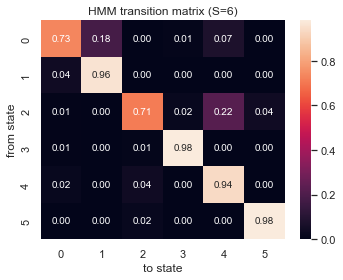

In [16]:
plt.figure(figsize=(5,4))
sns.heatmap(trans, annot=True, fmt=".2f")
plt.title("HMM transition matrix (S=6)")
plt.xlabel("to state")
plt.ylabel("from state")
plt.tight_layout()
plt.show()